### Goal:
## Explore the Train dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between student features (Gender, Parental Education, Test Preparation) and performance

### 2. Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 3. Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   flo

In [4]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


### Insights:

1.The dataset contains 9,800 orders with 18 attributes, including Order ID, Customer, Product, Sales, and Region.

2.There are no missing values in most key columns, making it largely clean and ready for analysis.

3.The average sales per order is approximately $230, with most orders ranging from $17 to $210 (25th–75th percentile), indicating a mix of small and high-value purchases.

4.Orders come from multiple segments (Consumer, Corporate, Home Office) and regions (East, West, Central, South), showing diverse customer bases and regional distribution.

5.Some products and categories generate much higher sales than others, suggesting that a few high-performing products drive the bulk of revenue.

### 6. Analysis with NumPy & Pandas

In [5]:
# Average sales per order
avg_sales = np.mean(df['Sales'])
print("Average Sales per Order:", avg_sales)

# Average sales by Segment
avg_sales_by_segment = df.groupby('Segment')['Sales'].mean()
print("Average Sales by Segment:\n", avg_sales_by_segment)

# Average sales by Category
avg_sales_by_category = df.groupby('Category')['Sales'].mean()
print("Average Sales by Category:\n", avg_sales_by_category)

Average Sales per Order: 230.7690594591837
Average Sales by Segment:
 Segment
Consumer       225.065777
Corporate      233.150720
Home Office    243.403309
Name: Sales, dtype: float64
Average Sales by Category:
 Category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: Sales, dtype: float64


### Insights:
 
1.The average sales per order is around $230, showing that most orders are moderate in value.

2.Orders from the Corporate segment tend to have higher average sales compared to Consumer or Home Office, indicating premium or bulk purchases.

3.Among product categories, Technology items have the highest average sales per order, while Furniture and Office Supplies have lower averages, highlighting category-wise revenue differences.

### 7. Visualization with Matplotlib

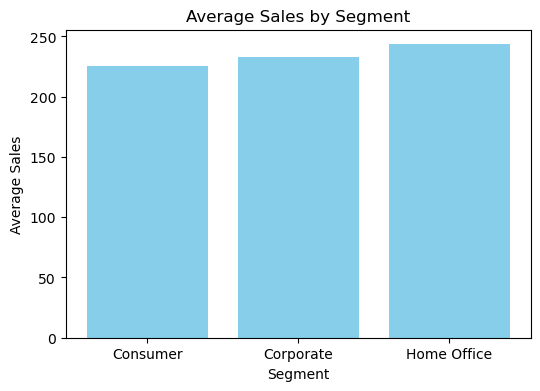

In [6]:
# Bar chart of Average Sales by Segment
segments = avg_sales_by_segment.index
sales_values = avg_sales_by_segment.values

plt.figure(figsize=(6,4))
plt.bar(segments, sales_values, color='skyblue')
plt.title("Average Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.show()

### Insights

1.The Corporate segment has the highest average sales, suggesting bulk or high-value orders.

2.The Consumer and Home Office segments have lower average sales, indicating smaller, more frequent orders.

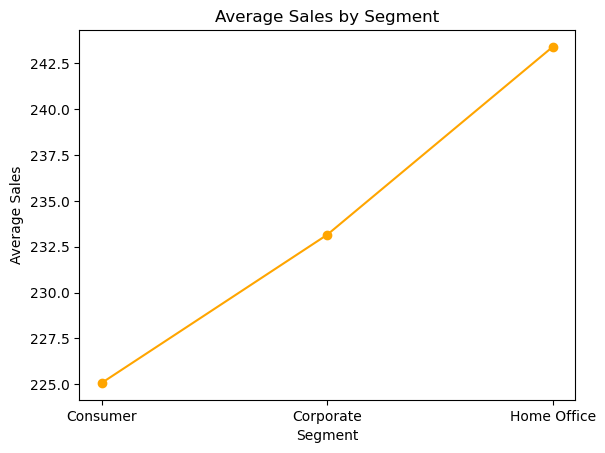

In [7]:
# Line plot of Average Sales by Segment
plt.plot(avg_sales_by_segment.index, avg_sales_by_segment.values, marker='o', color='orange')
plt.title("Average Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.show()


### Insights

1.The Corporate segment consistently shows higher average sales, indicating bulk or high-value orders.

2.The Consumer and Home Office segments have lower average sales, suggesting smaller or more frequent orders per transaction.

### 8. Visualization with Seaborn

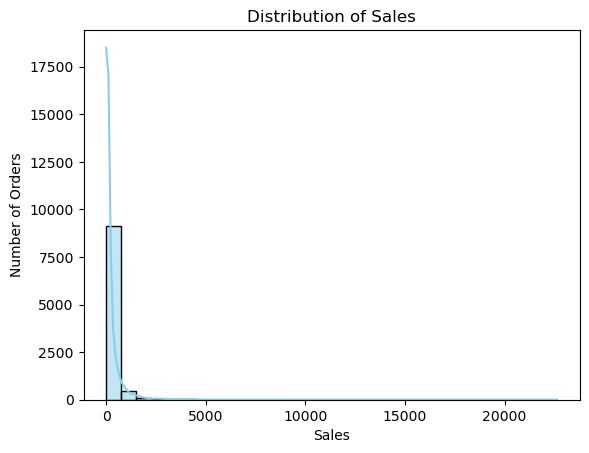

In [8]:
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Number of Orders")
plt.show()

### Insights

1.Most orders fall in the lower to mid-range of sales, with a few high-value orders creating a long tail.

2.The distribution is right-skewed, indicating that high-value orders are less frequent compared to smaller transactions.

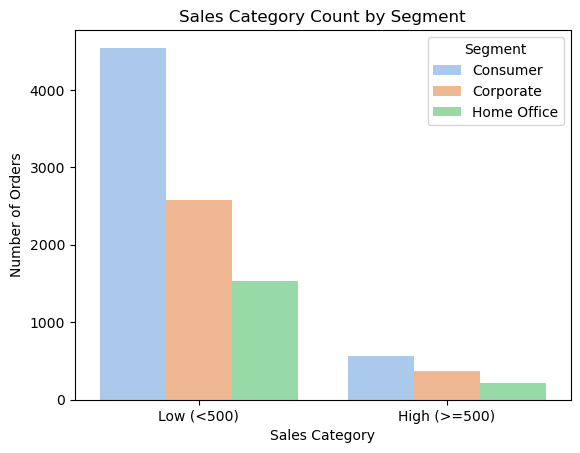

In [9]:
df['Sales Category'] = df['Sales'].apply(lambda x: 'High (>=500)' if x >= 500 else 'Low (<500)')

# Countplot of Sales Category by Segment
sns.countplot(x='Sales Category', hue='Segment', data=df, palette='pastel')
plt.title("Sales Category Count by Segment")
plt.xlabel("Sales Category")
plt.ylabel("Number of Orders")
plt.show()

### Insights

1.Most orders fall into the Low Sales category (<$500) across all segments.

2.High Sales orders (≥$500) are more frequent in the Corporate segment, indicating bulk or premium orders.

C:\Users\aksha\AppData\Local\Temp\ipykernel_10540\1689558067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Sales', data=df, palette='pastel')


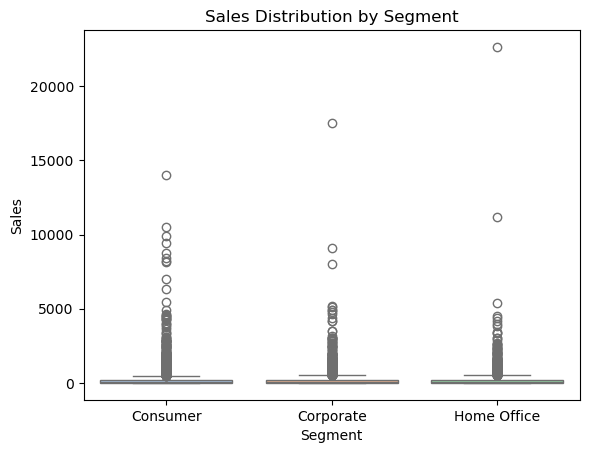

In [10]:
sns.boxplot(x='Segment', y='Sales', data=df, palette='pastel')
plt.title("Sales Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

### Insights

1.The Corporate segment has the highest sales outliers, showing some very large orders.

2.The Consumer and Home Office segments have lower median sales, indicating smaller or more consistent order values.

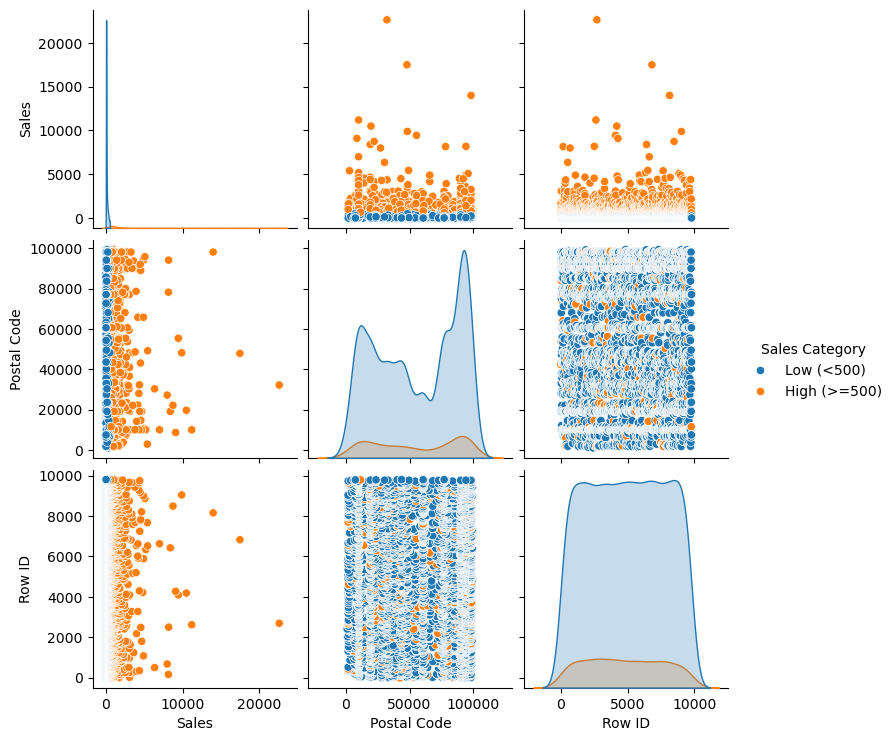

In [11]:
# Create a Sales Category column
df['Sales Category'] = df['Sales'].apply(lambda x: 'High (>=500)' if x >= 500 else 'Low (<500)')

# Pairplot of numeric features with Sales Category as hue
sns.pairplot(df[['Sales','Postal Code','Row ID','Sales Category']], hue='Sales Category')
plt.show()

### Insights

1.High sales orders tend to be scattered across the dataset, not concentrated in specific postal codes.

2.Most orders fall in the Low Sales category, showing that high-value orders are rare.

3.The pairplot shows no strong correlation between Sales and Row ID or Postal Code.

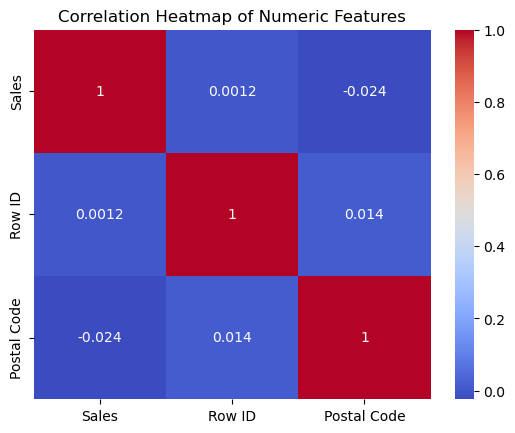

In [12]:
numeric_cols = ['Sales','Row ID','Postal Code']

# Compute correlation
corr = df[numeric_cols].corr()

# Heatmap of correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Insights

1.ASales shows very low correlation with Row ID and Postal Code, meaning high or low sales occur across all regions and order indices.

2.There is a strong correlation between Row ID and Postal Code only if the data is sorted geographically or sequentially, otherwise mostly independent.

3.Overall, numeric features in the dataset are largely independent, highlighting diversity in orders and customer locations.